#### Imports

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

from helper.normalizer import normalize
from config import FEATURES_USED_BY_CLASSIFIER

#### Einlesen der Daten und Aufteilen in Training- und Testdaten

In [2]:
df = pd.read_csv('output_isDigit.csv')
df = df[df['stopwords_removed'] == True]
df = df[df['author'] != 'ALL']
df = df[df['link_distance'] == 1]
df = df[df['fixed_token_count'] == df['fixed_token_count'].max()]

features = FEATURES_USED_BY_CLASSIFIER

df = normalize(df, features)

df_train = df[df['language'] == 'en'] # Trainingsdaten
df_test = df[df['language'] == 'de'] # Testdaten


X_train = df_train[features]
y_train = df_train['author']

X_test = df_test[features]
y_test = df_test['author']

#### Trainieren des Klassifikators und Speichern der Genauigkeitswerte

In [3]:
from sklearn.neighbors import KNeighborsClassifier

decision_tree = DecisionTreeClassifier()
nn_classificator = KNeighborsClassifier(n_neighbors=5)


classifier = decision_tree

accuracy_score_list = []

# Um Zufallseffekte zu umgehen, bilden wir den Durchschnitt der Genauigkeit in 100 unterschiedlichen Läufen
for _ in range(100):

    classifier.fit(X_train, y_train)

    y_prediction = classifier.predict(X_test)

    accuracy_score_list.append(accuracy_score(y_test, y_prediction))

print(np.mean(accuracy_score_list))



0.5294117647058824


In [4]:
classifier.fit(X_train, y_train)

y_prediction = classifier.predict(X_test)
df_test['author_predicted'] = y_prediction
print(df_test[['author', 'author_predicted']])

       author author_predicted
68     Austen        Nietzsche
69     Austen        Nietzsche
70      Hesse        Nietzsche
72      Hesse            Hesse
73  Nietzsche        Nietzsche
75  Nietzsche        Nietzsche
81  Nietzsche        Nietzsche
82     Austen        Nietzsche
84      Kafka        Nietzsche
85     Austen        Nietzsche
90      Hesse        Nietzsche
92      Hesse            Hesse
93      Kafka        Nietzsche
94  Nietzsche        Nietzsche
95  Nietzsche        Nietzsche
97      Kafka            Kafka
99      Kafka            Kafka


/var/folders/1b/4rzm4lxn2rl2qs92rlgd_4m80000gp/T/ipykernel_6701/3518115105.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['author_predicted'] = y_prediction


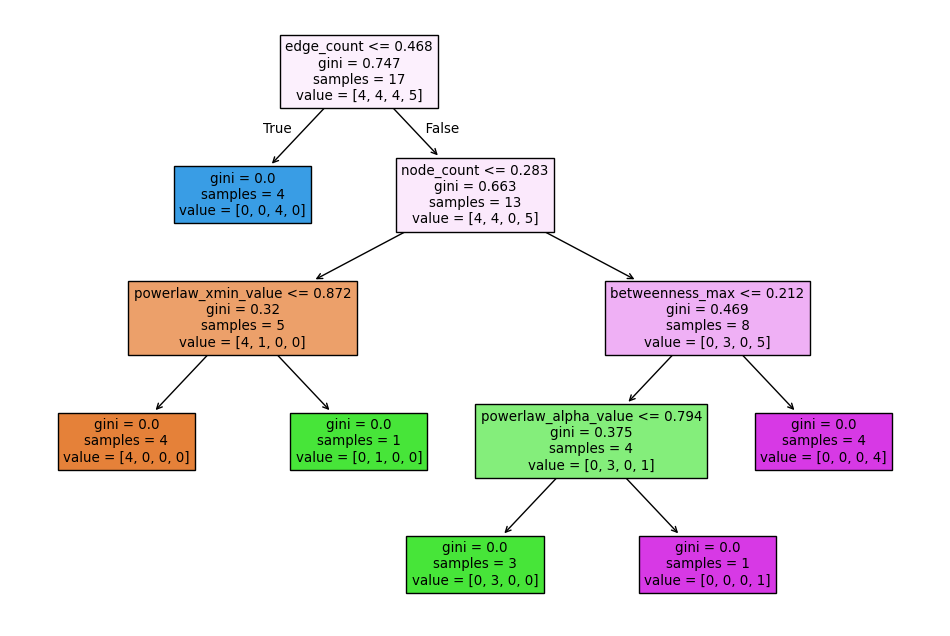

edge_count: 0.322
node_count: 0.257
betweenness_max: 0.177
powerlaw_xmin_value: 0.126
powerlaw_alpha_value: 0.118
average_degree: 0.000
median_degree: 0.000
diameter: 0.000
average_distance: 0.000
betweenness_average: 0.000
betweenness_standard_deviation: 0.000
average_clustering: 0.000
assortativity_coefficient: 0.000


In [5]:
# Darstellung von ChatGPT
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(classifier, feature_names=features, filled=True)
plt.show()

for name, imp in sorted(zip(features, classifier.feature_importances_), key=lambda x: x[1], reverse=True):
    print(f'{name}: {imp:.3f}')